In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [50]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [3]:
df = pd.read_csv('Data/uspopulation.csv', index_col='DATE', parse_dates=True)
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [4]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [5]:
df.index.freq = 'MS'

---

<AxesSubplot: xlabel='DATE'>

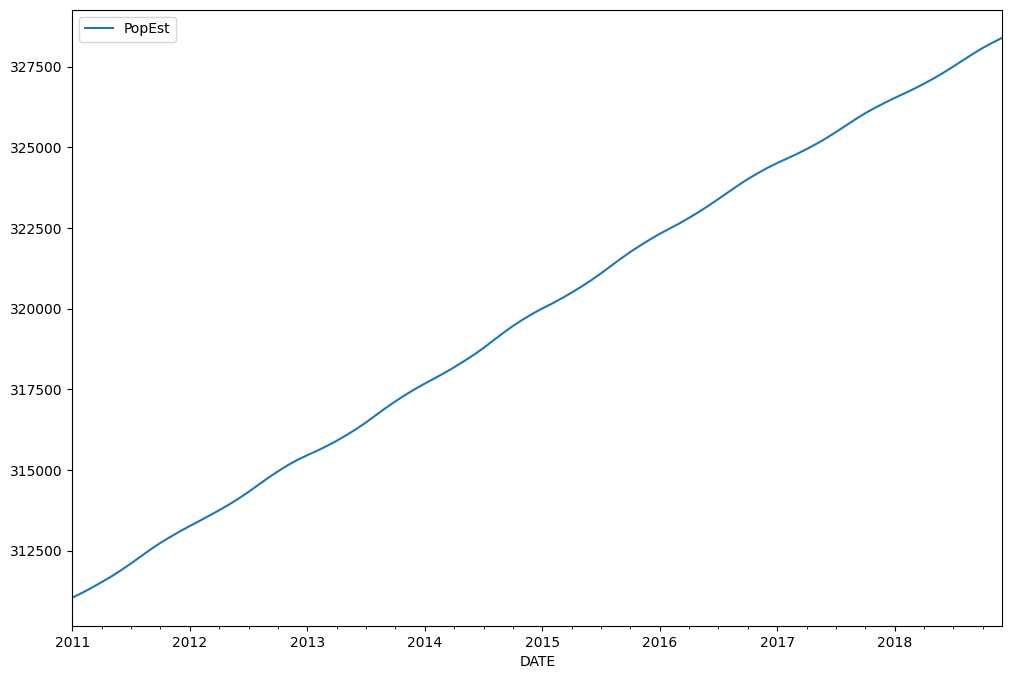

In [7]:
df.plot(figsize=(12,8))

In [8]:
len(df)

96

In [21]:
train = df.iloc[:96-12]
test = df.iloc[96-12:]

In [35]:
model1 = AutoReg(train['PopEst'], lags=1).fit()

In [23]:
model1.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [36]:
pred1 = model1.predict(start=len(train), end=len(train) + len(test) - 1)
pred1 = pred1.rename('AR(1) Predictions')
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot: xlabel='DATE'>

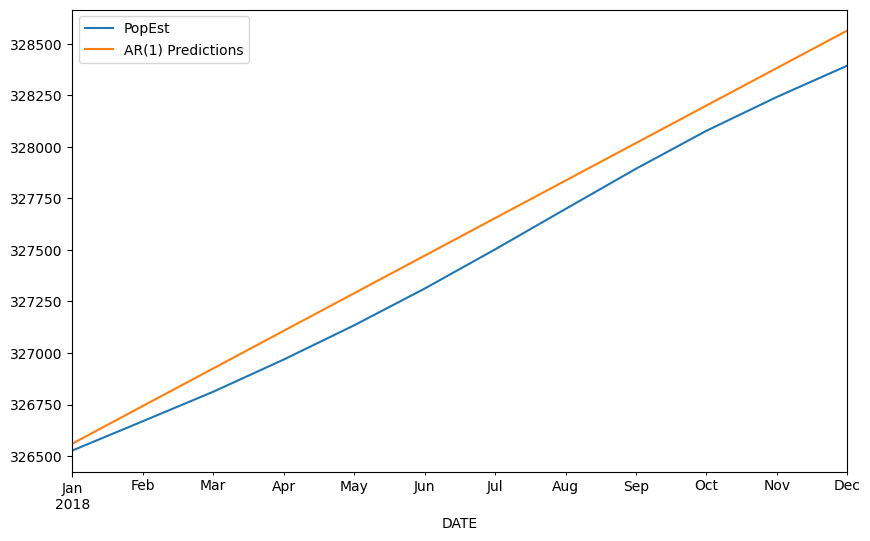

In [31]:
test.plot(figsize=(10,6), legend=True)
pred1.plot(legend=True)

In [32]:
model2 = AutoReg(train['PopEst'], lags=2).fit()

In [33]:
model2.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [39]:
pred2 = model2.predict(start=len(train), end=len(train) + len(test) - 1)
pred2 = pred2.rename('AR(2) Predictions')
pred2

2018-01-01    326535.672503
2018-02-01    326694.718511
2018-03-01    326854.882251
2018-04-01    327015.944950
2018-05-01    327177.719501
2018-06-01    327340.045898
2018-07-01    327502.787334
2018-08-01    327665.826850
2018-09-01    327829.064485
2018-10-01    327992.414814
2018-11-01    328155.804865
2018-12-01    328319.172314
Freq: MS, Name: AR(2) Predictions, dtype: float64

<AxesSubplot: xlabel='DATE'>

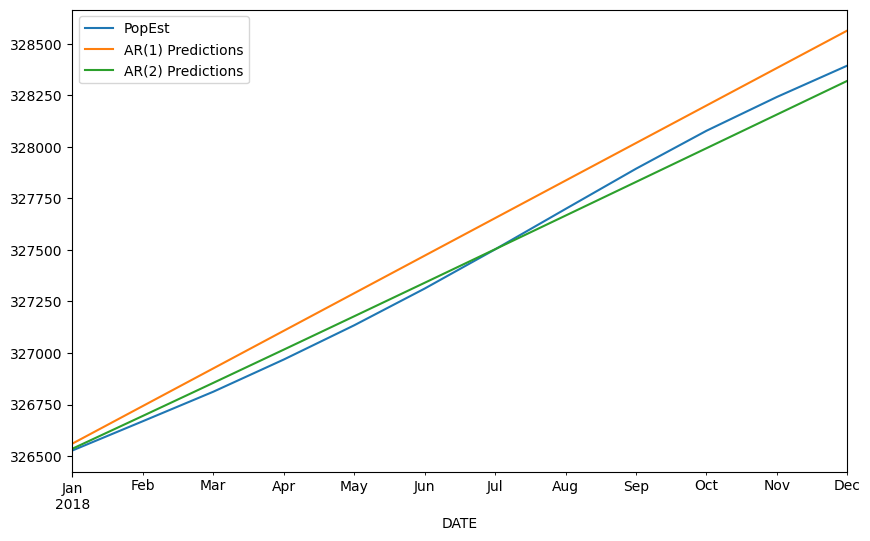

In [41]:
test.plot(figsize=(10,6), legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)

### 자동으로 판단

In [52]:
mod = ar_select_order(train['PopEst'], maxlag=40)
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [53]:
model3 = AutoReg(train['PopEst'], lags=mod.ar_lags).fit()
model3.params

const         65.705249
PopEst.L1      2.379112
PopEst.L2     -2.146708
PopEst.L3      1.335860
PopEst.L4     -1.156822
PopEst.L5      1.127592
PopEst.L6     -1.162676
PopEst.L7      1.206832
PopEst.L8     -1.022914
PopEst.L9      0.970189
PopEst.L10    -1.184151
PopEst.L11     1.315582
PopEst.L12    -0.636578
PopEst.L13    -0.308903
PopEst.L14     0.283418
dtype: float64

In [54]:
pred3 = model3.predict(start=len(train), end=len(train) + len(test) - 1)
pred3 = pred3.rename('AR(auto) Predictions')
pred3

2018-01-01    326520.461641
2018-02-01    326651.254173
2018-03-01    326783.424576
2018-04-01    326927.205002
2018-05-01    327084.129530
2018-06-01    327254.435944
2018-07-01    327439.587679
2018-08-01    327632.912071
2018-09-01    327827.654007
2018-10-01    328011.529881
2018-11-01    328177.716849
2018-12-01    328330.796206
Freq: MS, Name: AR(auto) Predictions, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error

In [55]:
labels = ['AR1', 'AR2', 'AR3']

In [56]:
preds = [pred1, pred2, pred3]

In [57]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714232861767
AR2 MSE was: 2713.2583562234418
AR3 MSE was: 2766.781354323604


<AxesSubplot: xlabel='DATE'>

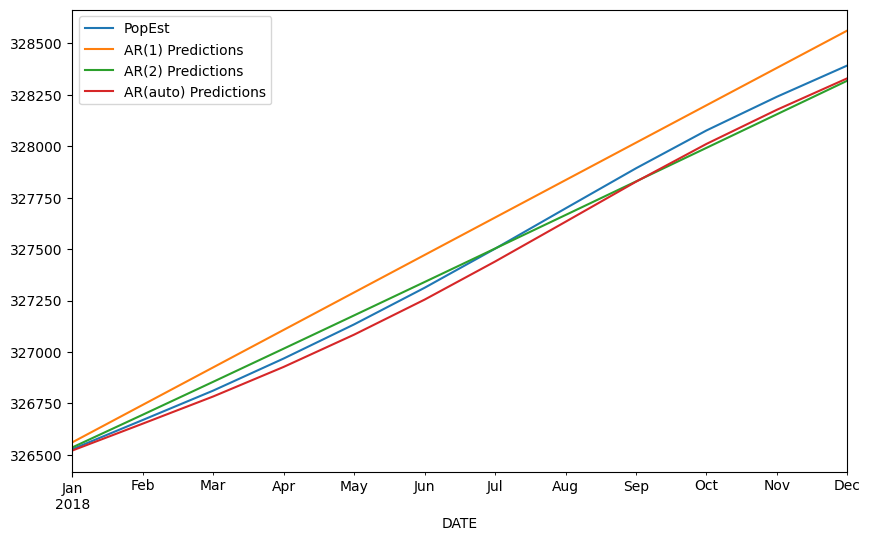

In [58]:
test.plot(figsize=(10,6), legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)
pred3.plot(legend=True)

### 미래 예측

In [59]:
mod = ar_select_order(df['PopEst'], maxlag=40)
forecasted_values = AutoReg(df['PopEst'], lags=mod.ar_lags).fit().predict(start=len(df), end=len(df)+12).rename('Forcast')

<AxesSubplot: xlabel='DATE'>

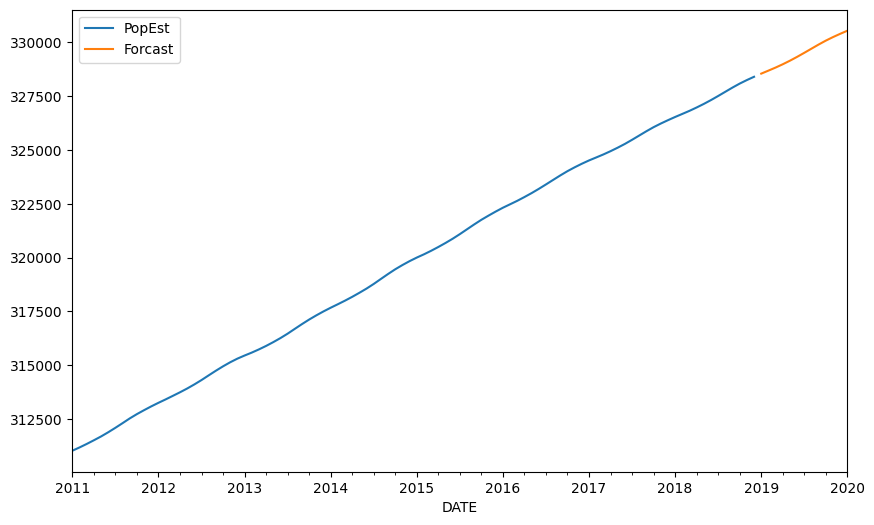

In [60]:
df['PopEst'].plot(figsize=(10,6), legend=True)
forecasted_values.plot(legend=True)